# Sheet

In [9]:
#IMPORTING LIBARARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
data = './CAR DETAILS FROM CAR DEKHO.csv'
df = pd.read_csv(data)

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [13]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

### QQ PLOT

In [14]:
def diagnostic_plots(df, variable):
    ''' function to plot a histogram and a Q-Q plot
    side by side, for a certain variable '''
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()
    

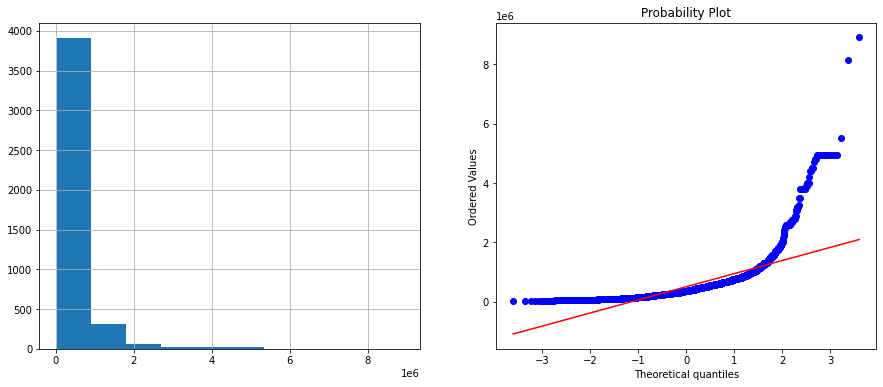

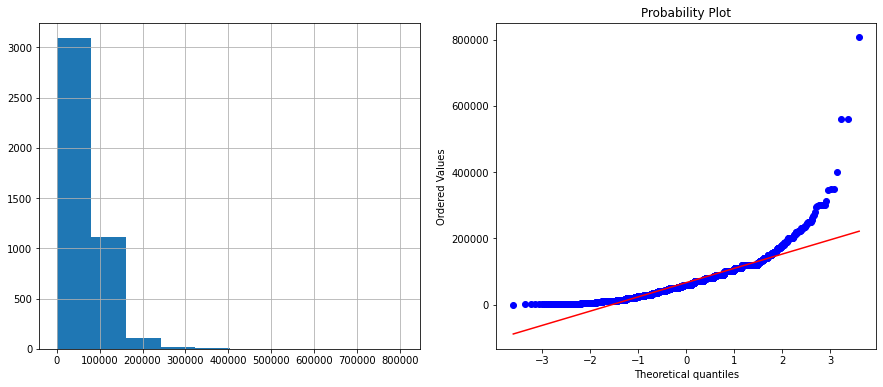

In [15]:
#QQ PLOTS FOR SELLING PRICE AND KM DRIVEN
diagnostic_plots(df,'selling_price')
diagnostic_plots(df,'km_driven')

From the above plot we can say that both the distributions are right skewed and do not follow Guassian Distribution

## LOG TRANSFORMATION ON NUMERICAL VARIABLES

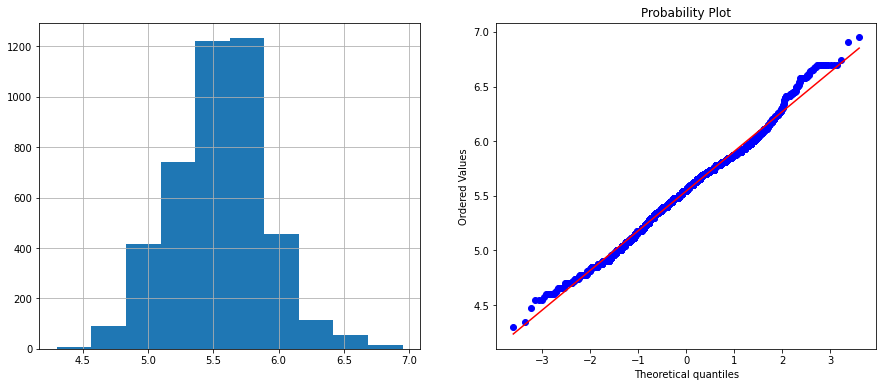

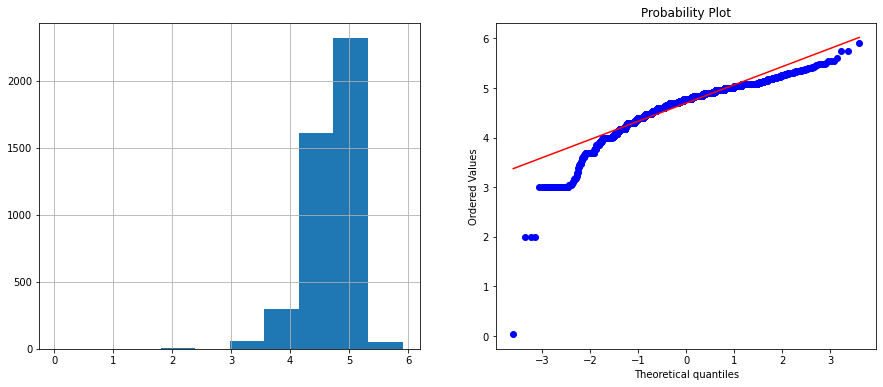

In [16]:
#APPLYING LOG TRANSFORMATON ON PRICE AND SELLING PRICE

df['Log_Price']=np.log10(df['selling_price']+0.1)
diagnostic_plots(df,'Log_Price')

df['Log_km_driven']=np.log10(df['km_driven']+0.1)
diagnostic_plots(df,'Log_km_driven')


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Years')

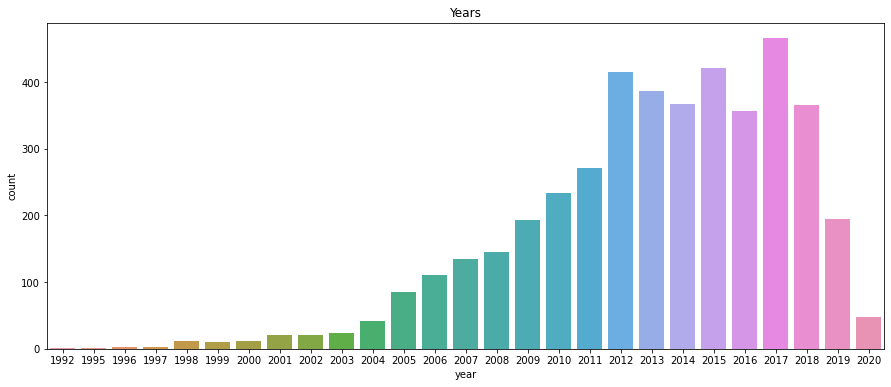

In [17]:
#YEARS
plt.figure(figsize = (15,6))
sns.countplot(df['year'])
plt.title("Years")

## HANDLING CATEGORICAL DATA - ONE HOT ENCODING

In [18]:
#CONVERTING LEAST OCCURING FUEL TYPES TO OTHERS

df['fuel'] = df['fuel'].replace(['CNG','LPG','Electric'],'Others')

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='count'>

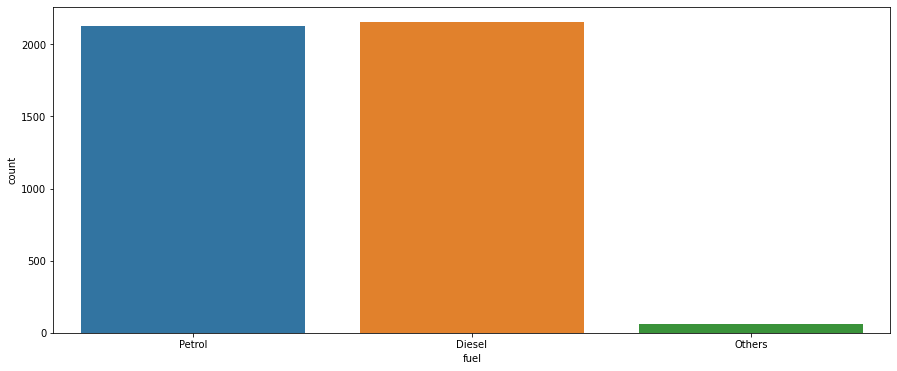

In [19]:
#COUNTPLOT OF FUEL
plt.figure(figsize = (15,6))
sns.countplot(df['fuel'])

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='count'>

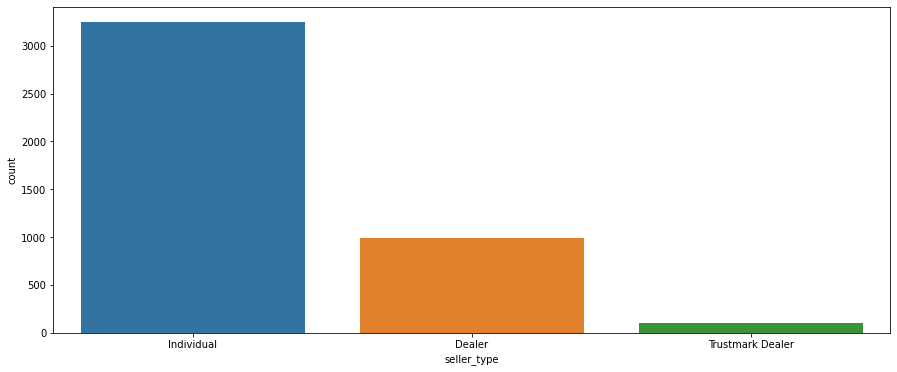

In [20]:
#COUNTPLOT OF SELLER_TYPE
plt.figure(figsize = (15,6))
sns.countplot(df['seller_type'])

In [21]:
# Create dummy variables for the catgeorical variable sellertype

df['seller_type_individual'] = np.where(df['seller_type']=='Individual', 1, 0)
df['seller_type_dealer'] = np.where(df['seller_type']=='Dealer', 1, 0)
df['seller_type_Trustmark Dealer'] = np.where(df['seller_type']=='Trustmark Dealer', 1, 0)

# Drop the original column sellertype from the dataframe
df.drop(columns=['seller_type'],axis=1,inplace=True)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

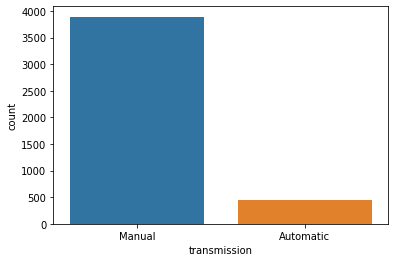

In [22]:
#COUNTPLOT OF CATEGORICAL FEATURE TRANSMISSION
sns.countplot(df['transmission'])

In [23]:
# ONE HOT ENCODING TRANSMISSION

df['transmission_manual'] = np.where(df['transmission']=='Manual', 1, 0)


# Drop the original column Transmission from the dataframe
df.drop(columns=['transmission'],axis=1,inplace=True)

In [24]:
#ONE HOT ENCODING OWNER
df['first_owner_indicator'] = np.where(df['owner']=='First Owner', 1, 0)
df['second_owner_indicator'] = np.where(df['owner']=='Second Owner', 1, 0)
df['third_owner_indicator'] = np.where(df['owner']=='Third Owner', 1, 0)
df['fourth_owner_indicator'] = np.where(df['owner']=='Fourth & Above Owner', 1, 0)
df['test_drive_indicator'] = np.where(df['owner']=='Test Drive Car', 1, 0)


# Drop the original column Transmission from the dataframe
df.drop(columns=['owner'],axis=1,inplace=True)

In [25]:
#ONE HOT ENCODING FUEL
df['fuel_petrol'] = np.where(df['fuel']=='Petrol', 1, 0)
df['fuel_diesel'] = np.where(df['fuel']=='Diesel', 1, 0)
df['fuel_others'] = np.where(df['fuel']=='Others', 1, 0)

# Drop the original column fuel from the dataframe
df.drop(columns=['fuel'],axis=1,inplace=True)

In [26]:
#GROUPING CAR NAME FOR FINDING OUT MEAN SELLING PRICE

df_car = df.groupby('name')['selling_price'].mean().sort_values().reset_index()

In [27]:
df_car

,name,selling_price
0,Ford Ikon 1.6 ZXI NXt,20000.0
1,Ford Ikon 1.4 ZXi,22000.0
2,Maruti 800 EX,35000.0
3,Tata Nano Std BSII,35000.0
4,OpelCorsa 1.4 GL,35000.0
...,...,...
1486,Audi A5 Sportback,4700000.0
1487,BMW X5 xDrive 30d xLine,4950000.0
1488,Mercedes-Benz GLS 2016-2020 350d 4MATIC,5500000.0
1489,Mercedes-Benz S-Class S 350d Connoisseurs Edition,8150000.0


<AxesSubplot:>

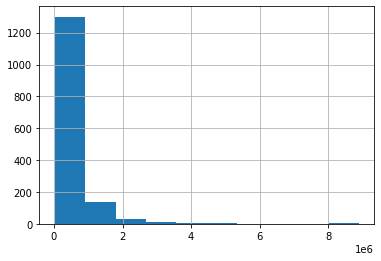

In [28]:
df_car['selling_price'].hist()

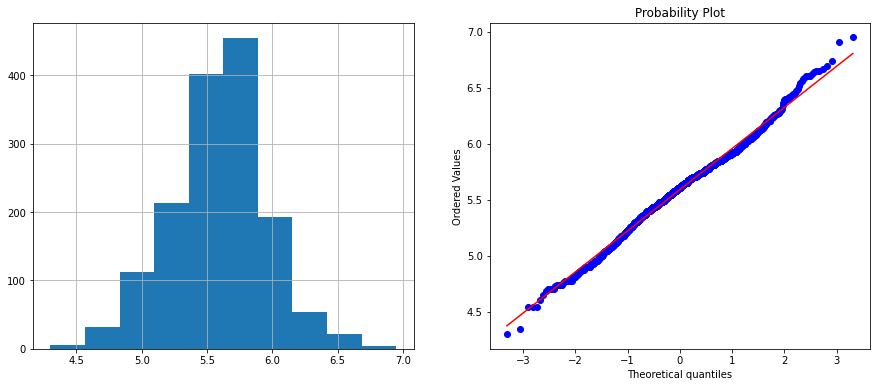

In [29]:
#LOG TRANSFORMATION OF BRAND_PRICE

df_car['Log_Brand_price']=np.log10(df_car['selling_price']+0.1)
diagnostic_plots(df_car,'Log_Brand_price')

In [30]:
df_car

,name,selling_price,Log_Brand_price
0,Ford Ikon 1.6 ZXI NXt,20000.0,4.301032
1,Ford Ikon 1.4 ZXi,22000.0,4.342425
2,Maruti 800 EX,35000.0,4.544069
3,Tata Nano Std BSII,35000.0,4.544069
4,OpelCorsa 1.4 GL,35000.0,4.544069
...,...,...,...
1486,Audi A5 Sportback,4700000.0,6.672098
1487,BMW X5 xDrive 30d xLine,4950000.0,6.694605
1488,Mercedes-Benz GLS 2016-2020 350d 4MATIC,5500000.0,6.740363
1489,Mercedes-Benz S-Class S 350d Connoisseurs Edition,8150000.0,6.911158


In [31]:
#EXTRACTING CAR_NAMES AND BRAND PRICES
car_names_list = df_car['name']
car_brand_price_list = df_car['Log_Brand_price']

In [32]:
#CREATING NAME AND BRANDPRICE DICTIONARY
name_brandprice_dict = dict(zip(car_names_list,car_brand_price_list))

In [33]:
#ADDING A CAR_VALUE COLUMN TO OUR DATAFRAME TO  GET RID OF CAR NAMES
df['Car_value'] = df['name'].map(name_brandprice_dict)

In [34]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'Log_Price',
       'Log_km_driven', 'seller_type_individual', 'seller_type_dealer',
       'seller_type_Trustmark Dealer', 'transmission_manual',
       'first_owner_indicator', 'second_owner_indicator',
       'third_owner_indicator', 'fourth_owner_indicator',
       'test_drive_indicator', 'fuel_petrol', 'fuel_diesel', 'fuel_others',
       'Car_value'],
      dtype='object')

In [35]:
final_features_list = ['year','Log_km_driven','seller_type_individual', 'seller_type_dealer',
       'seller_type_Trustmark Dealer', 'transmission_manual',
       'first_owner_indicator', 'second_owner_indicator',
       'third_owner_indicator', 'fourth_owner_indicator',
       'test_drive_indicator', 'fuel_petrol', 'fuel_diesel', 'fuel_others',
       'Car_value']

In [36]:
df_final = df[final_features_list]

<AxesSubplot:>

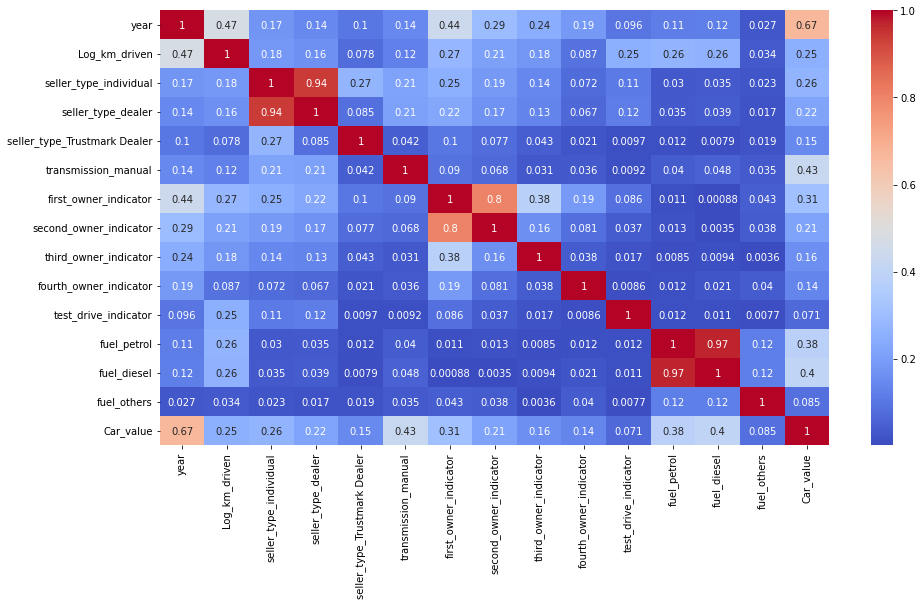

In [37]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df_final.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [41]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif

In [43]:
calc_vif(df_final[[i for i in df_final.describe().columns if i not in ['seller_type_individual','seller_type_dealer','fuel_petrol','fuel_diesel','fuel_others'
                                                                     'seller_type_Trustmark Dealer','first_owner_indicator',
                                                                     'second_owner_indicator','third_owner_indicator','fourth_owner_indicator','test_drive_indicator']]])

,variables,VIF
0,year,665.666156
1,Log_km_driven,152.308703
2,seller_type_Trustmark Dealer,1.049347
3,transmission_manual,11.929849
4,fuel_others,1.022792
5,Car_value,354.862624


In [44]:
#CREATING INPUT AND OUTPUT FEATURES
X = df_final
y = df['Log_Price']



In [45]:
df_final

,year,Log_km_driven,seller_type_individual,seller_type_dealer,seller_type_Trustmark Dealer,transmission_manual,first_owner_indicator,second_owner_indicator,third_owner_indicator,fourth_owner_indicator,test_drive_indicator,fuel_petrol,fuel_diesel,fuel_others,Car_value
0,2007,4.845099,1,0,0,1,1,0,0,0,0,1,0,0,4.974732
1,2007,4.698971,1,0,0,1,1,0,0,0,0,1,0,0,5.159618
2,2012,5.000000,1,0,0,1,1,0,0,0,0,0,1,0,5.690786
3,2017,4.662759,1,0,0,1,1,0,0,0,0,1,0,0,5.361728
4,2014,5.149219,1,0,0,1,0,1,0,0,0,0,1,0,5.724731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,4.903091,1,0,0,1,0,1,0,0,0,0,1,0,5.569374
4336,2014,4.903091,1,0,0,1,0,1,0,0,0,0,1,0,5.612783
4337,2009,4.919079,1,0,0,1,0,1,0,0,0,1,0,0,4.949390
4338,2016,4.954243,1,0,0,1,1,0,0,0,0,0,1,0,6.074329


In [46]:
#TRAIN-TEST-SPLIT (30% for testing - 70% for training)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(3038, 15)
(1302, 15)


In [47]:
#IMPORTING LINEAR REGRESSION AND FITTING THE DATA
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [49]:
#CHECKING THE SCORE
reg.score(X_train, y_train)

0.9402597604771782

In [50]:
my_test_value = df_final.iloc[1].reset_index()[1].tolist()

In [51]:
10**reg.predict([my_test_value]) 

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## WE OBTAINED A SCORE OF 94%

In [52]:
#THE COEFFICIENT LIST 
reg.coef_

In [53]:
#THE INTERCEPT
reg.intercept_

-12.664802909193025

In [ ]:
y_pred = reg.predict(X_test)

In [59]:
#PRINTING MSE AND RMSE SOCRES

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**y_test, 10**y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8658695683.479467
RMSE : 93052.11272980033


In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(10**y_test, 10**y_pred)
print("R2 Score :" ,r2)
print("Adjusted R2 Score: ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 Score : 0.974604974435236
Adjusted R2 Score:  0.9743087649613079


## Lasso Regression

In [99]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0000001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=1e-07, max_iter=3000)

In [100]:
lasso.score(X_train, y_train)

0.9402597604387959

In [101]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,0.0000001]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014, 1e-07]},
             scoring='neg_mean_squared_error')

In [102]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.008025009012605408


In [103]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [104]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8687704458.940369
RMSE : 93207.85620826374
R2 : 0.97451989480877
Adjusted R2 :  0.9742226929597276


## RIDGE REGRESSION

In [107]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.002,0.00001]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.002, 1e-05]},
             scoring='neg_mean_squared_error')

In [108]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.008003864960159042


In [109]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [110]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8660622279.148582
RMSE : 93062.4643943442
R2 : 0.9745993239368169
Adjusted R2 :  0.9743030485550535


## ELASTICNET REGRESSION

In [128]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [129]:
#FITTING WITH DEFAULT ALPHA VALUE
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [130]:
elasticnet.score(X_train, y_train)

0.6076734148609518

In [131]:
y_pred_en = elasticnet.predict(X_test)

In [132]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 249956522851.312
RMSE : 499956.52096088516
R2 : 0.2669043329470815
Adjusted R2 :  0.2583534503609277


In [133]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [134]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using  {'alpha': 0.0001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.00802520806887266


In [135]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [136]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8691866624.179485
RMSE : 93230.18086531573
R2 : 0.9745076876246264
Adjusted R2 :  0.974210343390077


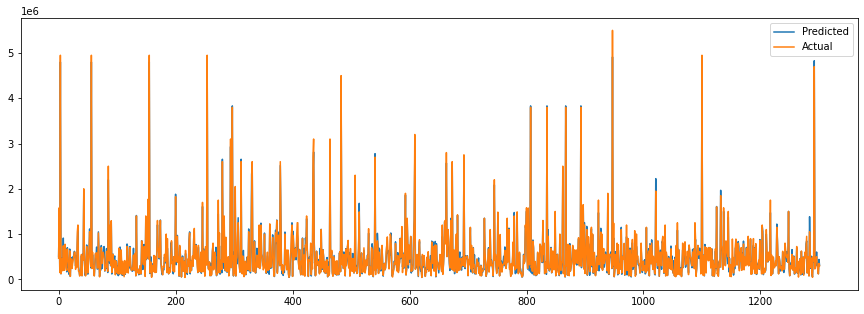

In [137]:
plt.figure(figsize=(15,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

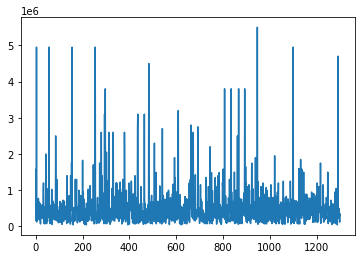

In [127]:
print(plt.plot(10**np.array(y_test)))

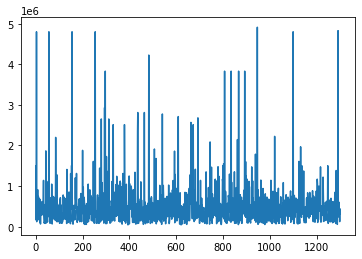

In [126]:
print(plt.plot(10**(y_pred_elastic)))

# Sheet 2

# HANDLING CATEGORICAL FEATURES IN LINEAR REGRESSION